**CrossTab function** (powerful tool for analyzing and summarizing categorical data)

Allows you to compute a frequency table of two or more variables, which summarizes the distribution of values in the data and provides insights into the relationships between the variables. 
Cross tabulation (or crosstab) is an important tool for analyzing two categorical variables in a dataset. It provides a tabular summary of the frequency distribution of two variables, allowing us to see the relationship between them and identify any patterns or trends.

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({
    'gender': ['male', 'male', 'female', 'female', 'male', 'female', 'male', 'female'],
    'education_level': ['high school', 'college', 'college', 'graduate', 'high school', 'graduate', 'college', 'graduate'],
    'score': [75, 82, 88, 95, 69, 92, 78, 85]
})
df

,gender,education_level,score
0,male,high school,75
1,male,college,82
2,female,college,88
3,female,graduate,95
4,male,high school,69
5,female,graduate,92
6,male,college,78
7,female,graduate,85


In [5]:
# create a crosstab table of gender and education level
cross_Tab = pd.crosstab(df['gender'], df['education_level'])
cross_Tab

education_level,college,graduate,high school
gender,,,
female,1,3,0
male,2,0,2


In [8]:
# create a crosstab table of gender and education level with mean score
ct_mean = pd.crosstab(df['gender'], df['education_level'], 
                    values=df['score'], aggfunc='mean')
ct_mean

education_level,college,graduate,high school
gender,,,
female,88.0,90.666667,NaN
male,80.0,NaN,72.0


education_level,college,graduate,high school,All
gender,,,,
female,1,3,0,4
male,2,0,2,4
All,3,3,2,8


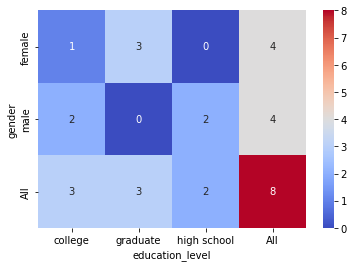

In [9]:
import seaborn as sns

ct_margins = pd.crosstab(df['gender'], df['education_level'], margins=True)
sns.heatmap(ct_margins, cmap='coolwarm', annot=True)
ct_margins

In [10]:
# create a crosstab table of gender and education level with normalization
#This can be useful for comparing the relative frequencies of different combinations of variables.
ct_norm = pd.crosstab(df['gender'], df['education_level'], normalize=True, margins=True)
ct_norm

education_level,college,graduate,high school,All
gender,,,,
female,0.125,0.375,0.00,0.5
male,0.250,0.000,0.25,0.5
All,0.375,0.375,0.25,1.0


<AxesSubplot:xlabel='gender'>

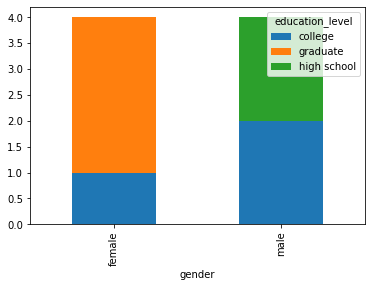

In [12]:
# create a crosstab table of gender and education level with visualization

ct_v = pd.crosstab(df['gender'], df['education_level'])
ct_v.plot(kind='bar', stacked=True)

In [14]:
# performing crosstabs with multiple columns
pd.crosstab([df.gender,df.education_level],df.score)

score                   69  75  78  82  85  88  92  95
gender education_level                                
female college           0   0   0   0   0   1   0   0
       graduate          0   0   0   0   1   0   1   1
male   college           0   0   1   1   0   0   0   0
       high school       1   1   0   0   0   0   0   0